### Time_Series_Forecast_Multiple_Linear_Regression
changed from this video - https://www.youtube.com/watch?v=td9QLuijh9c


In [4]:
import os, sys, io
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [5]:
!python --version

Python 3.9.12


In [6]:
data_string = """YR,QTR,Sales
2009,1,50147
2009,2,49325
2009,3,57048
2009,4,76781
2010,1,48617
2010,2,50898
2010,3,58517
2010,4,77691
2011,1,50862
2011,2,53028
2011,3,58849
2011,4,79660
2012,1,51640
2012,2,54119
2012,3,65681
2012,4,85175
2013,1,56405
2013,2,60031
2013,3,71486
2013,4,92183
2014,1,60800
2014,2,64900
2014,3,76997
2014,4,103337
2015,1,
2015,2,
2015,3,
2015,4,
"""

data = io. StringIO(data_string)
df_orig = pd.read_csv(data, sep=",")
df = df_orig.copy()

In [7]:
display(df.head())
display("-"*40)
display(df.tail())
display("-"*40)
display(df.dtypes)
display("-"*40)

,YR,QTR,Sales
0,2009,1,50147.0
1,2009,2,49325.0
2,2009,3,57048.0
3,2009,4,76781.0
4,2010,1,48617.0


'----------------------------------------'

,YR,QTR,Sales
23,2014,4,103337.0
24,2015,1,NaN
25,2015,2,NaN
26,2015,3,NaN
27,2015,4,NaN


'----------------------------------------'

YR         int64
QTR        int64
Sales    float64
dtype: object

'----------------------------------------'

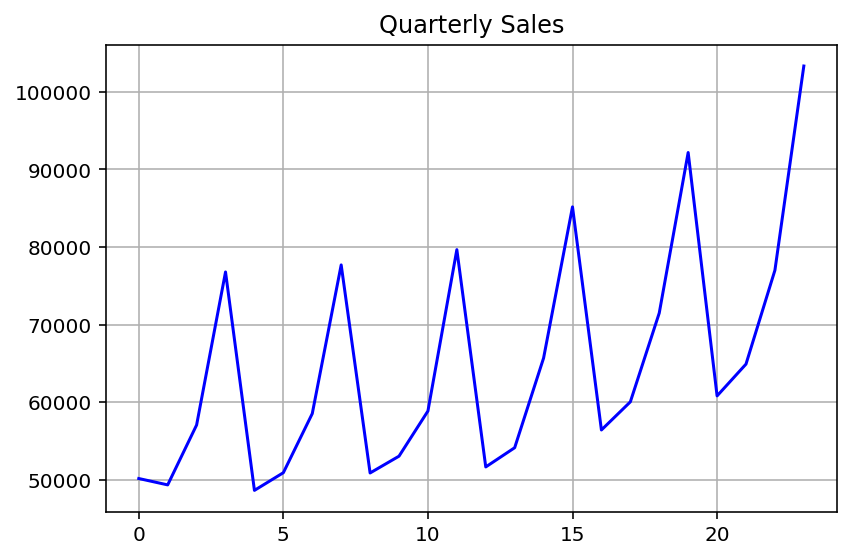

In [8]:
fig, ax = plt.subplots(figsize=(6,4))
_ = ax.plot(df.index,df.Sales,color="blue")
_ = ax.set_title(f"Quarterly Sales")
_ = ax.grid(True)
fig.tight_layout()
plt.show() ; # semicolon needed to remove text output on top

In [9]:
df['t_qtr'] = df.index + 1
df['t_qtr2'] = df['t_qtr']**2
df['t_qtr3'] = df['t_qtr']**3
display(df.head())

,YR,QTR,Sales,t_qtr,t_qtr2,t_qtr3
0,2009,1,50147.0,1,1,1
1,2009,2,49325.0,2,4,8
2,2009,3,57048.0,3,9,27
3,2009,4,76781.0,4,16,64
4,2010,1,48617.0,5,25,125


In [10]:
df['Qtr'] = df['QTR'].astype(str)
display(df.head())
display(df.dtypes)

,YR,QTR,Sales,t_qtr,t_qtr2,t_qtr3,Qtr
0,2009,1,50147.0,1,1,1,1
1,2009,2,49325.0,2,4,8,2
2,2009,3,57048.0,3,9,27,3
3,2009,4,76781.0,4,16,64,4
4,2010,1,48617.0,5,25,125,1


YR          int64
QTR         int64
Sales     float64
t_qtr       int64
t_qtr2      int64
t_qtr3      int64
Qtr        object
dtype: object

In [11]:
df = pd.get_dummies(df,prefix=['Qtr'], columns=['Qtr'],drop_first=True)
display(df.head())

,YR,QTR,Sales,t_qtr,t_qtr2,t_qtr3,Qtr_2,Qtr_3,Qtr_4
0,2009,1,50147.0,1,1,1,0,0,0
1,2009,2,49325.0,2,4,8,1,0,0
2,2009,3,57048.0,3,9,27,0,1,0
3,2009,4,76781.0,4,16,64,0,0,1
4,2010,1,48617.0,5,25,125,0,0,0


In [12]:
df = df.drop(columns=['YR','QTR'])
display(df.head())

,Sales,t_qtr,t_qtr2,t_qtr3,Qtr_2,Qtr_3,Qtr_4
0,50147.0,1,1,1,0,0,0
1,49325.0,2,4,8,1,0,0
2,57048.0,3,9,27,0,1,0
3,76781.0,4,16,64,0,0,1
4,48617.0,5,25,125,0,0,0


In [13]:
# Partition data into training, validation, forecast

training       = df.loc[0:19]
validation     = df.loc[20:23]
trainplusvalid = df.loc[0:23]
forecast       = df.loc[24:27]
display(forecast)

,Sales,t_qtr,t_qtr2,t_qtr3,Qtr_2,Qtr_3,Qtr_4
24,NaN,25,625,15625,0,0,0
25,NaN,26,676,17576,1,0,0
26,NaN,27,729,19683,0,1,0
27,NaN,28,784,21952,0,0,1


In [14]:
# separate outcome variable "y" from input DataFrame

y_train = training['Sales']
x_train = training.drop(columns=['Sales'])

y_valid = validation['Sales']
x_valid = validation.drop(columns=['Sales'])

y_trainplusvalid = trainplusvalid['Sales']
x_trainplusvalid = trainplusvalid.drop(columns=['Sales'])

x_forecast = forecast.drop(columns=['Sales'])

### Which combination of input variables creates the best model

In [16]:
model = LinearRegression()
_ = model.fit(x_train, y_train)

In [17]:
X2 = sm.add_constant(x_train)
display(X2.head())

,const,t_qtr,t_qtr2,t_qtr3,Qtr_2,Qtr_3,Qtr_4
0,1.0,1,1,1,0,0,0
1,1.0,2,4,8,1,0,0
2,1.0,3,9,27,0,1,0
3,1.0,4,16,64,0,0,1
4,1.0,5,25,125,0,0,0


sklearn creates the model but doesn't show coefficients and model fit stats.
<br>Fortunately, the Statsmodel library (sm) does produce this information.
<br>So we refit a regression model using sm to get regression coefficients (and p-values on the regression coefficients).

In [18]:
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     450.4
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           2.63e-14
Time:                        18:36:38   Log-Likelihood:                -164.43
No. Observations:                  20   AIC:                             342.9
Df Residuals:                      13   BIC:                             349.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.893e+04   1245.230     39.296      0.0

### Interpretation of Coefficients

none of the coefficients on time (t_qtr, t_qtr2, t_qtr3) are
statistically significant. But our chart of the model
suggests that
sales increase over time.
So maybe we are including too many time-related coefficients
thus model has a hard time getting good estimates
because it is trying to separate three time coefficients.
The line fit for time squared and time cubed
look to be very close together.

To evaluate the quality of a predictive model we need both y-actual and y-predicted.
We already have y-actuals in the validation data.
Now we create y-predicted from the model and the x-validation data.
The model we trained from sklearn can produce y-predicted, so we do that.


In [19]:
# use the trained model to predict the y-values for the records in the validation dataset.

y_pred = model.predict(x_valid)
display(y_pred)

array([ 66177.93008768,  70182.86636827,  81223.73318059, 103556.33052464])

In [20]:
## Create a dataframe to display the results of the actual versus the preicted values
# so you can easily see them side-by-side.

df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df.sort_index()

,Actual,Predicted
20,60800.0,66177.930088
21,64900.0,70182.866368
22,76997.0,81223.733181
23,103337.0,103556.330525


In [21]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print(f"R2   = {R2:.3f}")
print(f"MAE  = {MAE:.1f}")
print(f"RMSE = {RMSE:.1f}")
print("These results mean our regression is pretty good")

R2   = 0.932
MAE  = 3776.7
RMSE = 4322.7
These results mean our regression is pretty good


### Model 2: Keep t_qtr and t_qtr2 (drop t_qtr3)

in this section, you will drop t_qrt3 and evaluate the model.

We are probably overfitting with too many time input variables.
<br>Let's drop time cubed term (t_qrt3) from the data and create a
new model. 
<br>Then we will evaluate that model.
<br>We must drop time cubed from both the x-train DataFrame
and the x-validation DataFrame

In [22]:
x_train_no_qtr3 = x_train.drop(columns=['t_qtr3'])
x_valid_no_qtr3 = x_valid.drop(columns=['t_qtr3'])

In [24]:
_ = model.fit(x_train_no_qtr3, y_train)

In [25]:
# Get the regression results that includes the coefficients and p-values
X2 = sm.add_constant(x_train_no_qtr3)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     527.9
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           2.01e-15
Time:                        18:37:03   Log-Likelihood:                -165.40
No. Observations:                  20   AIC:                             342.8
Df Residuals:                      14   BIC:                             348.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.992e+04    914.665     54.576      0.0

Our dropping the t_qtr3 seems to have helped.
<br>Now both t_wtr and t_qtr2 are significant.

In [26]:
# Our model is now "trained".
# so lets use it to predict the price of car using
# the x-values from the validation data set
y_pred = model.predict(x_valid_no_qtr3)
display(y_pred)

array([ 64947.24927007,  68417.10693431,  78776.96459854, 100282.62226277])

In [27]:
## Create a dataframe to display the results of the actual versus the predicted values

df = pd.DataFrame({"Actual":y_valid, "Predicted":y_pred})
df.sort_index

<bound method DataFrame.sort_index of       Actual      Predicted
20   60800.0   64947.249270
21   64900.0   68417.106934
22   76997.0   78776.964599
23  103337.0  100282.622263>

In [28]:
# To check for the quality of our regression, use model quality metrics.
# These metrics are calculated by comparing y_actual and y_predicted
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print(f"R2   = {R2:.3f}")
print(f"MAE  = {MAE:.1f}")
print(f"RMSE = {RMSE:.1f}")
print("These results mean our regression is pretty good")

R2   = 0.962
MAE  = 3124.7
RMSE = 3243.0
These results mean our regression is pretty good


After dropping the cubic term, the model improved.
<br>All time-based input variables are significant
<br>and the model fit statistics improved.
<br>So we can stop dropping terms.

### Model 3: Keep t_qtr and t_qtr3 (drop t_qtr2)

Since our curvilinear influence could be coming from t_qtr3,
<br>let's drop t_qtr2 and see what happens.

In [29]:
x_train_no_qtr2 = x_train.drop(columns=['t_qtr2'])
x_valid_no_qtr2 = x_valid.drop(columns=['t_qtr2'])

In [30]:
_ = model.fit(x_train_no_qtr2, y_train)

In [31]:
# Get the regression results that includes the coefficients and p-values
X2 = sm.add_constant(x_train_no_qtr2)
est = sm.OLS(y_train, X2)
est3 = est.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     582.1
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           1.02e-15
Time:                        18:37:24   Log-Likelihood:                -164.43
No. Observations:                  20   AIC:                             340.9
Df Residuals:                      14   BIC:                             346.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.894e+04    783.775     62.439      0.0

In [32]:
y_pred = model.predict(x_valid_no_qtr2)
display(y_pred)

array([ 66171.92900227,  70174.1843609 ,  81211.5871566 , 103539.93738939])

In [33]:
df = pd.DataFrame({"Actual":y_valid, "Predicted":y_pred})
df.sort_index

<bound method DataFrame.sort_index of       Actual      Predicted
20   60800.0   66171.929002
21   64900.0   70174.184361
22   76997.0   81211.587157
23  103337.0  103539.937389>

In [34]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print(f"R2   = {R2:.3f}")
print(f"MAE  = {MAE:.1f}")
print(f"RMSE = {RMSE:.1f}")

R2   = 0.932
MAE  = 3765.9
RMSE = 4315.0


After dropping the cubic and squared term, the model fit stats grew worse.
<br>So we know our model with time and time squared is a better model.

### Retrain the model using the traiplusvalid data

Now we know which predictor variables give us the best results.
<br>But our model is only trained with the training data.
<br>We have omitted the validation data from training.
<br>So we include the validation data with the training data and retrain the model.
<br>This will change the regression coefficients a little.
<br>But it should improve the estimates because our model benefits from the validation partition.

In [35]:
# Drop t+qtr3 from the input variables for the partitions
x_trainplusvalid_no_qtr3 = x_trainplusvalid.drop(columns=['t_qtr3'])
x_forecast_no_qtr3 = x_forecast.drop(columns=['t_qtr3'])

In [38]:
_ = model.fit(x_trainplusvalid_no_qtr3,y_trainplusvalid)

In [39]:
# Get the regression results that includes the coefficients and p-values
X2 = sm.add_constant(x_trainplusvalid_no_qtr3)
est = sm.OLS(y_trainplusvalid, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     374.6
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           1.56e-17
Time:                        18:37:41   Log-Likelihood:                -208.41
No. Observations:                  24   AIC:                             428.8
Df Residuals:                      18   BIC:                             435.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.959e+04   1209.724     40.995      0.0

In [40]:
## Use the trained model to predict (forecast) future values

y_pred = model.predict(x_forecast_no_qtr3)
display(y_pred)

array([ 72406.25102215,  76420.48824532,  87509.22546848, 110259.96269165])

In [41]:
## show graph
print(f"len(y_trainplusvalid) = {len(y_trainplusvalid)}")
print(f"len(y_pred) = {len(y_pred)}")

y_all = list(y_trainplusvalid) + list(y_pred)
print(f"len(y_all) = {len(y_all)}")
display(y_all)

len(y_trainplusvalid) = 24
len(y_pred) = 4
len(y_all) = 28


[50147.0,
 49325.0,
 57048.0,
 76781.0,
 48617.0,
 50898.0,
 58517.0,
 77691.0,
 50862.0,
 53028.0,
 58849.0,
 79660.0,
 51640.0,
 54119.0,
 65681.0,
 85175.0,
 56405.0,
 60031.0,
 71486.0,
 92183.0,
 60800.0,
 64900.0,
 76997.0,
 103337.0,
 72406.25102214678,
 76420.48824531547,
 87509.22546848415,
 110259.96269165285]

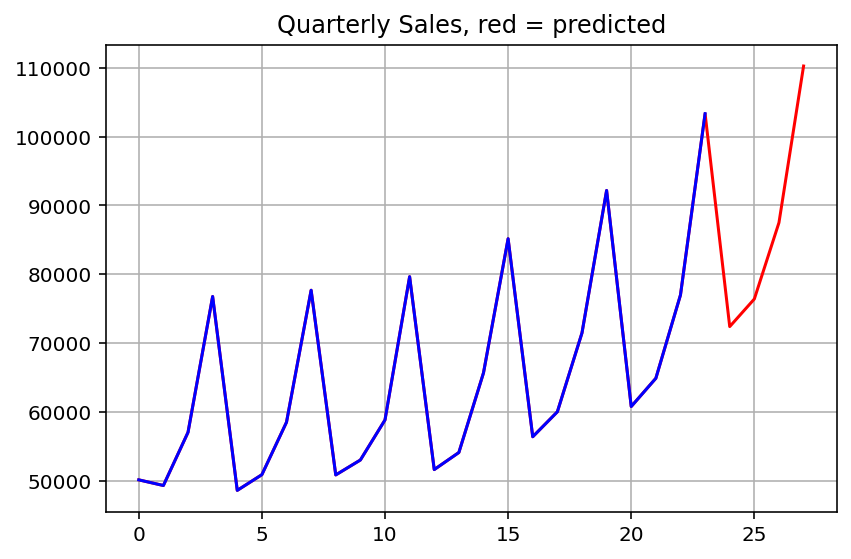

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
_ = ax.plot(df_orig.index, y_all, color="red")        
_ = ax.plot(df_orig.index, df_orig.Sales, color="blue")
_ = ax.set_title(f"Quarterly Sales, red = predicted")
_ = ax.grid(True)
fig.tight_layout()
plt.show() ; # semicolon needed to remove text output on top